
# 🌸 Iris Flower Classification — Beginner Project (CodeAlpha)
This notebook guides you **step by step** to build a simple machine learning model that predicts the **species of Iris flowers** from 4 measurements.
- **Skills you learn:** Python, pandas, matplotlib, scikit-learn, model training & evaluation.
- **Dataset:** The classic Iris dataset bundled with scikit-learn (no download needed).


## 1. Setup — Import libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Make outputs crisp
pd.set_option('display.precision', 3)
print("Libraries imported ✅")


Libraries imported ✅


In [4]:
import pandas as pd

# Load dataset from Kaggle input
df_from_link = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')

print("First 5 rows of the dataset:")
print(df_from_link.head())

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## 2. Load the Iris dataset

In [5]:

# Load iris as a pandas DataFrame
iris = load_iris(as_frame=True)
df = iris.frame.copy()

# Rename 'target' to 'species_id' and add a readable 'species' column
df = df.rename(columns={'target': 'species_id'})
id_to_name = {i: name for i, name in enumerate(iris.target_names)}
df['species'] = df['species_id'].map(id_to_name)

print("Shape:", df.shape)
df.head()


Shape: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 3. Quick data check (EDA)

In [6]:

print("Info:")
print(df.info())
print("\nClass balance:")
print(df['species'].value_counts())
print("\nSummary stats:")
df.describe()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species_id         150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Class balance:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Summary stats:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id
count,150.000,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199,1.000
std,0.828,0.436,1.765,0.762,0.819
min,4.300,2.000,1.000,0.100,0.000
25%,5.100,2.800,1.600,0.300,0.000
50%,5.800,3.000,4.350,1.300,1.000
75%,6.400,3.300,5.100,1.800,2.000
max,7.900,4.400,6.900,2.500,2.000


### 3.1 Feature distributions

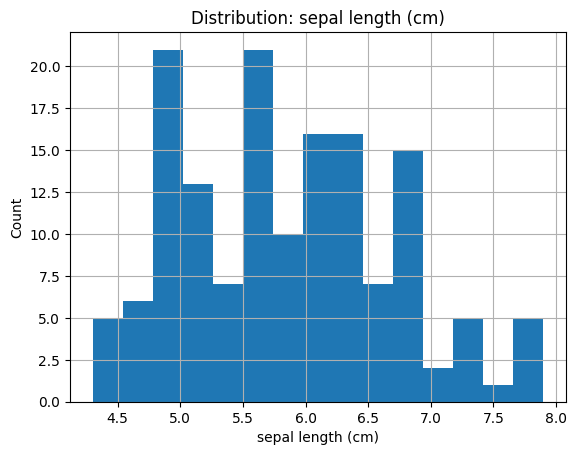

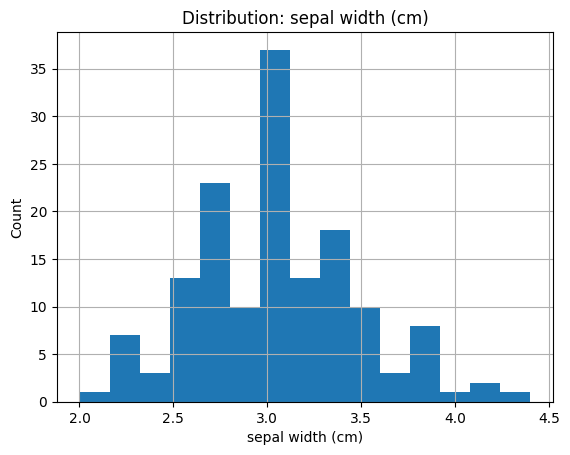

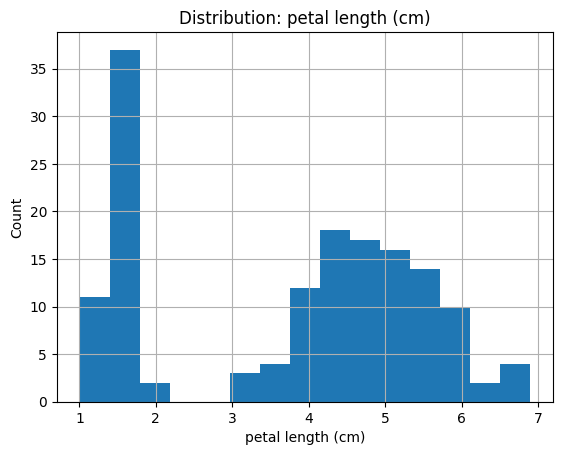

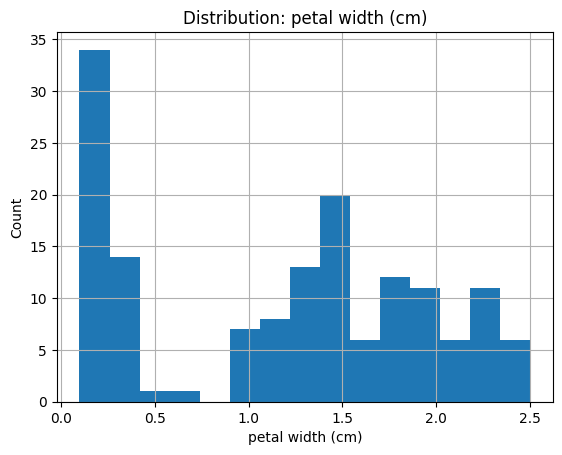

In [7]:

# Histograms for each numeric feature
features = iris.feature_names
for col in features:
    plt.figure()
    df[col].hist(bins=15)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


### 3.2 Simple scatter plot (two features)

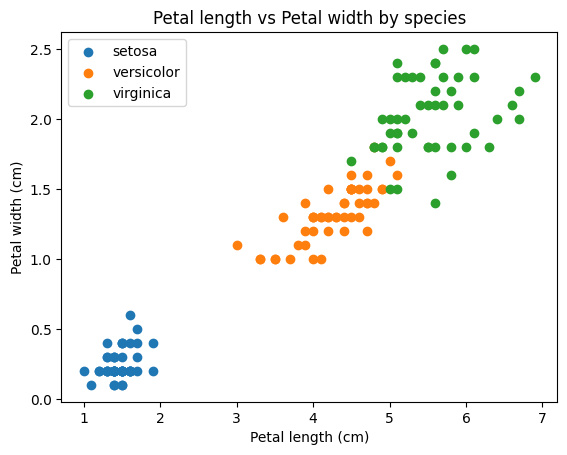

In [8]:

# Scatter plot: petal length vs petal width, colored by species (default colors)
plt.figure()
for name, group in df.groupby('species'):
    plt.scatter(group['petal length (cm)'], group['petal width (cm)'], label=name)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Petal length vs Petal width by species")
plt.legend()
plt.show()


## 4. Split into train and test sets

In [9]:

X = df[iris.feature_names]           # features
y = df['species']                    # target labels as names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (120, 4)  Test size: (30, 4)


## 5. Train a model (RandomForestClassifier)

In [10]:

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
print("Model trained ✅")


Model trained ✅


## 6. Evaluate the model

Accuracy: 0.900

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



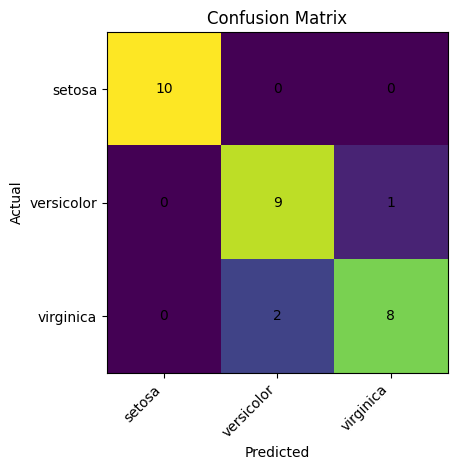

In [11]:

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")
print("Classification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix plot with matplotlib (one chart)
cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))
fig = plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.xticks(ticks=range(len(cm)), labels=sorted(y_test.unique()), rotation=45, ha='right')
plt.yticks(ticks=range(len(cm)), labels=sorted(y_test.unique()))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## 7. Save the trained model

In [12]:

joblib.dump(model, "iris_model.pkl")
print("Saved: iris_model.pkl ✅")


Saved: iris_model.pkl ✅


## 8. Try predictions with your own numbers

In [13]:

def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    sample = pd.DataFrame([{
        'sepal length (cm)': sepal_length,
        'sepal width (cm)': sepal_width,
        'petal length (cm)': petal_length,
        'petal width (cm)': petal_width
    }])
    return model.predict(sample)[0]

# Example:
print("Example prediction:", predict_species(5.1, 3.5, 1.4, 0.2))


Example prediction: setosa



## 9. What to submit
- This notebook (`Iris_Classification.ipynb`) with outputs.
- `iris_model.pkl` (saved model).
- Short README and a LinkedIn post (tag **@CodeAlpha**) briefly explaining your approach and results.


In [14]:
import os
print(os.listdir('/kaggle/working'))

['.virtual_documents', 'iris_model.pkl']


In [15]:
import os
print(os.listdir('/kaggle/working'))

['.virtual_documents', 'iris_model.pkl']
